#  Análise Exploratória – O//QUARTO Records (até Maio/2024)
Este notebook é uma análise realizada por José Lucas Aguilera entre fevereiro e maio de 2024, quando decidiu estudar Análise de Dados. Aqui, buscados padrões que embasar ações que impulsionarão o crescimento da gravadora.

In [1]:
#  Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#  Carregamento do dataset filtrado
df = pd.read_csv('dataset_2020_2024.csv')
df['Data início'] = pd.to_datetime(df['Data início'], errors='coerce', dayfirst=True)
df['Valor'] = pd.to_numeric(df['Valor'], errors='coerce')

/tmp/ipython-input-2-2402840241.py:3: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Data início'] = pd.to_datetime(df['Data início'], errors='coerce', dayfirst=True)


##  Faturamento por mês
Visualizar como o faturamento se comportava até maio de 2024.

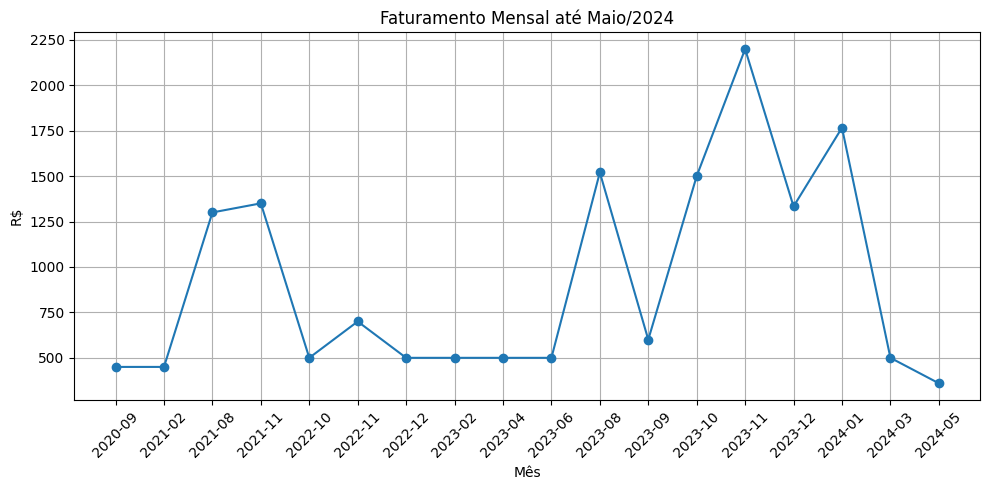

In [3]:
df['AnoMes'] = df['Data início'].dt.to_period('M')
faturamento_mensal = df.groupby('AnoMes')['Valor'].sum().reset_index()
faturamento_mensal['AnoMes'] = faturamento_mensal['AnoMes'].astype(str)
plt.figure(figsize=(10,5))
plt.plot(faturamento_mensal['AnoMes'], faturamento_mensal['Valor'], marker='o')
plt.title('Faturamento Mensal até Maio/2024')
plt.xticks(rotation=45)
plt.grid(True)
plt.xlabel('Mês')
plt.ylabel('R$')
plt.tight_layout()
plt.show()

##  Serviços mais contratados
Identificar quais serviços mais geravam demanda (e receita).

In [ ]:
servicos = df.groupby('Serviço')['Valor'].agg(['count', 'sum']).sort_values(by='sum', ascending=False)
servicos.rename(columns={'count': 'Nº Contratações', 'sum': 'Faturamento'}, inplace=True)
servicos

,Nº Contratações,Faturamento
Serviço,,
Produção Completa,28,15568
Gravação,3,720
Mix_master,1,240


##  Clientes mais recorrentes
Análise da fidelização: quem mais contratava?

In [ ]:
clientes = df['Nome_cliente'].value_counts().head(10)
clientes

,count
Nome_cliente,
Maria Calmaria,6
Leonardo Mariano,3
Ivo Souza,3
Alex Manguito,3
Paulo Fernando,2
Arthur Riguete,2
Rodrigo Moraes,2
Rodrigo Matheus,1
João Trilheiro,1


In [ ]:
# Contagem de clientes por origem
origens = df['Surgimento'].value_counts().reset_index()
origens.columns = ['Origem', 'Quantidade de Clientes']
print(origens)

          Origem  Quantidade de Clientes
0      Indicação                      19
1  Anúncio_insta                       9
2         Google                       2
3       Facebook                       1


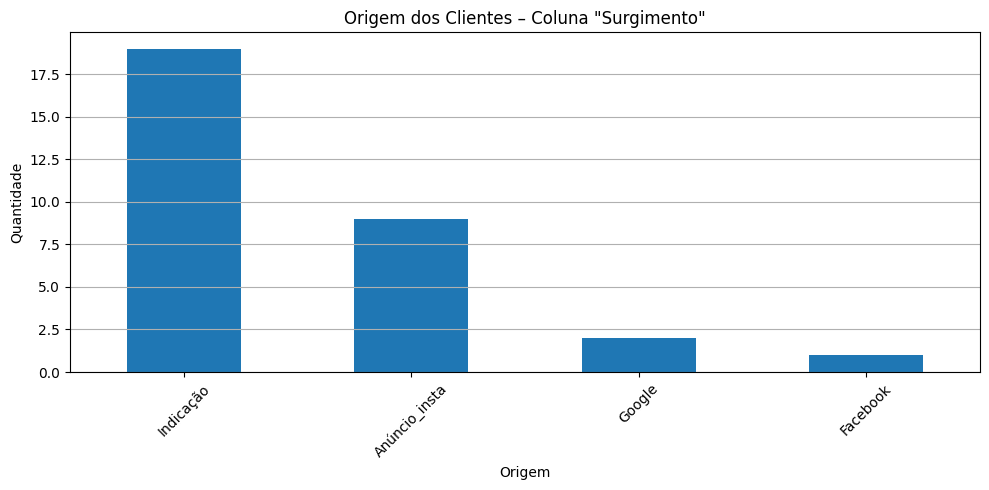

In [5]:
origens = df['Surgimento'].value_counts()

plt.figure(figsize=(10, 5))
origens.plot(kind='bar')
plt.title('Origem dos Clientes – Coluna "Surgimento"')
plt.xlabel('Origem')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
faturamento_por_origem = df.groupby('Surgimento')['Valor'].sum().sort_values(ascending=False)
print(faturamento_por_origem)

Surgimento
Indicação        9369
Anúncio_insta    4759
Google           1350
Facebook          600
Name: Valor, dtype: int64


In [ ]:
# Contagem de serviços realizados por estilo
estilos = df['Estilo'].value_counts().reset_index()
estilos.columns = ['Estilo', 'Quantidade de Serviços']
print(estilos)


      Estilo  Quantidade de Serviços
0        MPB                      14
1        Pop                       5
2       Rock                       4
3  Sertanejo                       2
4        R&B                       2
5   MPB/Rock                       1
6      Samba                       1
7        POP                       1
8     Pagode                       1
9    Musical                       1


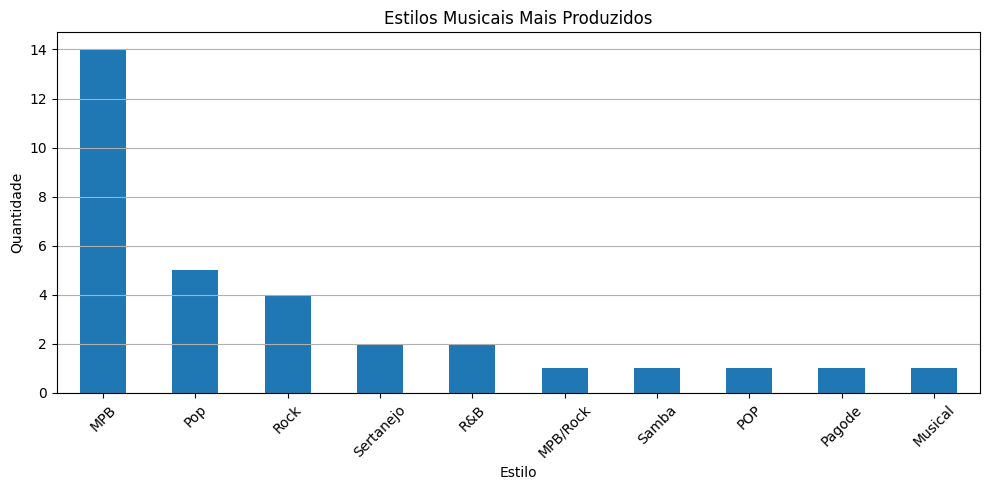

In [ ]:


estilos = df['Estilo'].value_counts()

plt.figure(figsize=(10, 5))
estilos.plot(kind='bar')
plt.title('Estilos Musicais Mais Produzidos')
plt.xlabel('Estilo')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
faturamento_por_estilo = df.groupby('Estilo')['Valor'].sum().sort_values(ascending=False)
print(faturamento_por_estilo)


Estilo
MPB          7132
Pop          2983
Rock         1650
R&B          1350
POP           720
Samba         633
Pagode        600
Musical       600
MPB/Rock      500
Sertanejo     360
Name: Valor, dtype: int64


###  Conclusões

1. **Origem dos clientes e faturamento**
   - A principal fonte de faturamento até maio/2024 foi a **Indicação**
    (R$ 9.369), o que reforça a confiança e satisfação dos clientes.
   - O canal de **Anúncios no Instagram** gerou R$ 4.759 — mostrando-se um meio promissor para aquisição de novos clientes de forma escalável.
   - Canais como **Google** e **Facebook** apresentaram retorno financeiro mais modesto.

2. **Estilos musicais mais contratados**
   - Os estilos **MPB**, **Pop** e **Rock** concentraram a maior parte das produções.
   - **MPB**, em especial, lidera tanto em volume de projetos quanto em faturamento (R$ 7.132).
   - Esses dados revelam o perfil predominante do público atendido pela gravadora até então.

3. **Insight central**
   - O principal aprendizado desta análise é que **o crescimento do faturamento depende diretamente do aumento na quantidade de novos clientes vindos dos anúncios no Instagram**.
   - Para isso, é essencial que os anúncios sejam **segmentados com base nos estilos mais procurados (MPB e Pop)**, maximizando as chances de conversão e retorno financeiro.

---

###  Próximas ações

- **Refinar os anúncios no Instagram**, com criativos e mensagens voltadas para artistas de **MPB** e **Pop**.
- **Explorar a linguagem visual, sonora e textual desses estilos** nas campanhas, criando identificação direta com o público-alvo.
- **Investir em tráfego pago com foco em conversão**, ampliando o volume de novos leads com maior potencial de retorno.
- **Continuar estimulando a indicação**, mas usar os dados para escalar de forma estratégica por meio do marketing digital.
